# Langchain Models
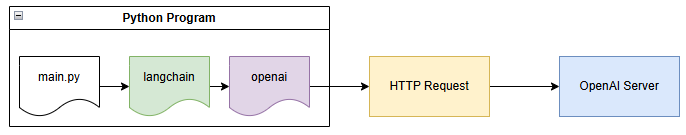

In [5]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [ ]:
OPENAI_API_KEY=os.environ["OPENAI_API_KEY"]
# print(OPENAI_API_KEY)

In [4]:
from langchain.llms import OpenAI
llm = OpenAI(
    openai_api_key=OPENAI_API_KEY

)
result = llm("Write a very short poem")
print(result)

C:\Users\sachi\AppData\Local\Temp\ipykernel_26680\581258352.py:2: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(
C:\Users\sachi\AppData\Local\Temp\ipykernel_26680\581258352.py:6: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = llm("Write a very short poem")




Roses red, violets blue
Nature's beauty, ever true
Fragrant petals, soft and sweet
A lovely sight, oh so neat


# Langchain Prompts

In [14]:
prompt = """
Answer the user's query based on the context below.
If you cannot answer the question using the
provided information answer with "I don't know".

Context: write very short poem on {ask}
"""

ask=input("Give the context : ")
print(llm(prompt))


A poem on {ask}:

Questions and queries,
They never cease.
Curiosity arises,
And we seek release.
With each {ask},
We learn and grow.
For knowledge and understanding,
Is what makes us glow.


## Using langchain prompt templates

In [16]:
from langchain import PromptTemplate

template = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: {query}

Answer: """

prompt_template = PromptTemplate(
    input_variables=["query"],
    template=template
)

In [17]:
print(
    prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )
)

Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: Which libraries and model providers offer LLMs?

Answer: 


In [19]:
print(llm(
    prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )
))

Hugging Face, OpenAI, and Cohere offer LLMs.


## Langchain Chains

In [31]:
from langchain.chains import LLMChain

# llm = OpenAI(
#     openai_api_key=api_key
# )

code_prompt = PromptTemplate(
    template="Write a very short {language} function that will {task}",
    input_variables=["language", "task"]
)

code_chain = LLMChain(
    llm=llm,
    prompt=code_prompt
)

result = code_chain({
    "language": "python",
    "task": "return a list of numbers"
})

print(result)

{'language': 'python', 'task': 'return a list of numbers', 'text': '\n\ndef return_list():\n    return [1, 2, 3, 4, 5]'}


In [36]:
print(result["text"])



def return_list():
    return [1, 2, 3, 4, 5]


## Sequential Chain

In [43]:
from langchain.chains import LLMChain, SequentialChain

# llm = OpenAI(
#     openai_api_key=api_key
# )

code_prompt = PromptTemplate(
    template="Write a very short {language} function that will {task}",
    input_variables=["language", "task"]
)

test_prompt = PromptTemplate(
    input_variables=["language", "code"],
    template="Write a test in {language} for the following {language} code:\n{code}"
)

code_chain = LLMChain(
    llm=llm,
    prompt=code_prompt,
    output_key="code"
)

test_chain = LLMChain(
    llm=llm,
    prompt=test_prompt,
    output_key="test"
)

chain = SequentialChain(
    chains=[code_chain, test_chain],
    input_variables=["task", "language"],
    output_variables=["test", "code"]
)

result = chain({
    "language": "python",
    "task": "return a list of numbers"
})

print(result)



{'language': 'python', 'task': 'return a list of numbers', 'test': "\n\nimport unittest\n\nclass TestReturnList(unittest.TestCase):\n    \n    def test_return_list(self):\n        self.assertEqual(return_list(), [1, 2, 3, 4, 5])\n\nif __name__ == '__main__':\n    unittest.main()", 'code': '\n\ndef return_list():\n    return [1, 2, 3, 4, 5]'}


In [44]:
print(result["code"],"\n")
print(result["test"])



def return_list():
    return [1, 2, 3, 4, 5] 



import unittest

class TestReturnList(unittest.TestCase):
    
    def test_return_list(self):
        self.assertEqual(return_list(), [1, 2, 3, 4, 5])

if __name__ == '__main__':
    unittest.main()


## Memory Management

In [ ]:
while True:
    content = input(">> ")

    print(f"You entered: {content}")


In [ ]:
from langchain.prompts import HumanMessagePromptTemplate, ChatPromptTemplate

prompt = ChatPromptTemplate(
    input_variables=["content"],
    messages=[
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

while True:
    content = input(">> ")

    print(f"You entered: {content}")

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain
from langchain.prompts import HumanMessagePromptTemplate, ChatPromptTemplate
from dotenv import load_dotenv

load_dotenv()

chat = ChatOpenAI()

prompt = ChatPromptTemplate(
    input_variables=["content"],
    messages=[
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

chain = LLMChain(
    llm=chat,
    prompt=prompt
)

while True:
    content = input(">> ")

    result = chain({"content": content})

    print(result["text"])